In [8]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch
import numpy as np

In [9]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


In [10]:
torch.cuda.is_available()

False

In [11]:
DEVICE

'cpu'

In [13]:
scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
An error occurred while trying to fetch google/ddpm-cat-256: google/ddpm-cat-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


OSError: google/ddpm-cat-256 does not appear to have a file named diffusion_pytorch_model.bin.

In [ ]:
pip install accelerate


In [14]:
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to(DEVICE)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


diffusion_pytorch_model.safetensors:  12%|#1        | 52.4M/455M [00:00<?, ?B/s]

In [15]:
model

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Con

In [19]:
num_of_timesteps=50
scheduler.set_timesteps(num_of_timesteps)


In [20]:
sample_size = model.config.sample_size


In [22]:
input = noise


In [24]:
for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample
        image = (input / 2 + 0.5).clamp(0, 1)
        image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
        image = Image.fromarray((image * 255).round().astype("uint8"))

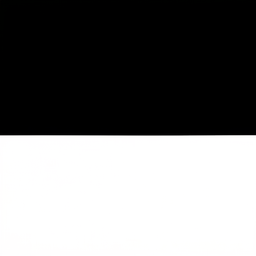

In [25]:
image